In [2]:
import networkx as nx
import numpy as np

In [59]:
G = nx.generators.random_graphs.barabasi_albert_graph(100,1,seed=23)
pos= nx.kamada_kawai_layout(G)
pos = nx.rescale_layout_dict(pos,20)

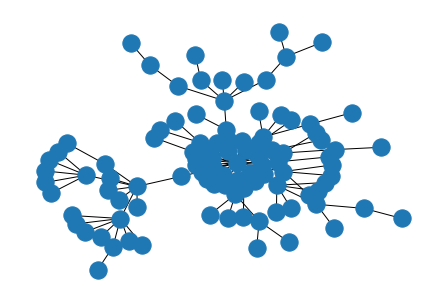

In [60]:
nx.draw(G,pos=pos)

In [61]:
deg = nx.degree(G)
print(deg)

[(0, 34), (1, 4), (2, 2), (3, 3), (4, 2), (5, 2), (6, 2), (7, 4), (8, 1), (9, 1), (10, 3), (11, 2), (12, 3), (13, 4), (14, 6), (15, 8), (16, 6), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 6), (25, 2), (26, 1), (27, 1), (28, 2), (29, 3), (30, 1), (31, 3), (32, 1), (33, 1), (34, 1), (35, 1), (36, 3), (37, 8), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 2), (56, 1), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 2), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1)]


In [62]:
cent = nx.betweenness_centrality(G)

In [63]:
#nx.set_node_attributes(G,values=cent,name="Centrality")
print(cent)

{0: 0.9123891981034837, 1: 0.07936507936507936, 2: 0.0202020202020202, 3: 0.05978148835291692, 4: 0.3492063492063492, 5: 0.0202020202020202, 6: 0.0202020202020202, 7: 0.09833024118738404, 8: 0.0, 9: 0.0, 10: 0.23294166151309006, 11: 0.0202020202020202, 12: 0.04019789734075448, 13: 0.05998763141620284, 14: 0.15460729746444032, 15: 0.37023294166151305, 16: 0.20882292310863737, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.03999175427746856, 22: 0.0, 23: 0.0, 24: 0.0989486703772418, 25: 0.05936920222634508, 26: 0.0, 27: 0.0, 28: 0.0202020202020202, 29: 0.04019789734075448, 30: 0.0, 31: 0.04019789734075448, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.05978148835291692, 37: 0.15563801278086992, 38: 0.0202020202020202, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0202020202020202, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.0, 51: 0.0, 52: 0.0, 53: 0.0, 54: 0.0, 55: 0.0202020202020202, 56: 0.0, 57: 0.0, 58: 0.0202020202020202, 59: 0.0, 60: 0.0, 61: 0.0, 62: 0.0, 63: 0.0, 64: 0.0, 65: 

In [71]:
root = np.argmax(cent.values())

In [93]:
levels = nx.single_source_shortest_path_length(G,root)
nx.set_node_attributes(G,values=levels,name="level")
nLevel = max(levels.values())+1

In [107]:
edges = [x for (x,d) in deg if d==1]
print(edges)
print(len(edges))

[8, 9, 17, 18, 19, 20, 22, 23, 26, 27, 30, 32, 33, 34, 35, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
70


In [40]:
nx.write_gexf(G,"graph.gexf")

In [82]:
entities = []
for n in G.nodes():
    hwr = (nLevel-levels[n])*10
    shape = "(%i,%i)"%((nLevel-levels[n]),10)
    ipt = (nLevel-levels[n])*1000
    entities.append(dict({"id":n,"name":0,"IPT":ipt,"HwReqs":hwr,"WATT":1,"RAM":1,"shape":shape}))

In [85]:
links = []
for (s,d) in G.edges():
    lat = (levels[s]+1)*2
    links.append(dict({"PR":lat,"s":s,"BW":1,"d":d}))

In [94]:
print(entities[0])

{'id': 0, 'name': 0, 'IPT': 6000, 'HwReqs': 60, 'WATT': 1, 'RAM': 1, 'shape': '(6,10)'}


In [106]:
with open("topology.json","w") as f:
    f.write("{\"link\":[\n")
    for link in links[:-1]:
        f.write(str(link).replace("'","\"")+",\n")
    f.write(str(links[-1]).replace("'","\""))
    f.write("],\n\"entity\":[\n")
    for n in entities[:-1]:
        f.write(str(n).replace("'","\"")+",\n")
    f.write(str(entities[-1]).replace("'","\""))
    f.write("]}")    